# Data Management and Regression Analysis

### Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

### Importing Audit fee data

In [71]:
AuditFee = pd.read_csv('/Users/divyapisal/Downloads/Audit fees 2016 small set.csv')

# Alter the names of columns in the file to match corresponding columns in Compustat file

AuditFee = AuditFee.rename(index=str, columns={"BEST_EDGAR_TICKER": "tic"})
AuditFee = AuditFee.rename(index=str, columns={"FISCAL_YEAR": "fyear"})

### Import Financial characteristics data

In [72]:
Compustat = pd.read_csv('/Users/divyapisal/Downloads/Compustat match with Audit fees 2016 small set.csv')

### Combining data from both files

In [74]:
Merge = pd.merge(AuditFee, Compustat, on=['tic', 'fyear'], how='outer')

We do an outer merge on the file based on the common columns in Audit fee file that we had renamed in a previous step to match the corresponding matching columns in the compustat file.

### Cleaning data and computing Correlation matrix

In [70]:
# Create a dataframe with only required columns from the merged data
df = Merge[['fyear', 'tic', 'AUDIT_FEES', 'act', 'at', 'mkvalt']]

# Fill all the NaN value with 0
df.fillna(0)

values = df.drop(['fyear', 'tic'], axis=1)
corr = values.corr()
corr

,AUDIT_FEES,act,at,mkvalt
AUDIT_FEES,1.000000,0.885190,0.885271,0.857554
act,0.885190,1.000000,0.980281,0.520974
at,0.885271,0.980281,1.000000,0.950604
mkvalt,0.857554,0.520974,0.950604,1.000000


We create the correlation matrix to analyze which financial characteristics have strongest relationship with Audit Fees. As we can observe from the matrix the Total Assets (at) and Current total Assets (act) have the highest correlation with Audit Fees.

### Visualizing Correlation matrix

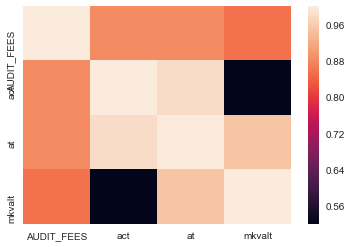

In [59]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The audit matrix  too demostrates that at and act have higest correlation

### Plot all financial characteristics against Audit fees

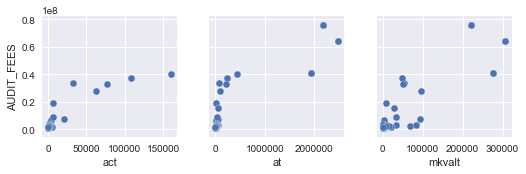

In [53]:
pp = sns.pairplot(data=df,
                  y_vars=['AUDIT_FEES'],
                  x_vars=['act', 'at', 'mkvalt'])
plt.show()

### Regression summary

In [56]:
result = sm.ols(formula="AUDIT_FEES ~ act + at + mkvalt", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     25.43
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           7.27e-07
Time:                        16:29:46   Log-Likelihood:                -388.44
No. Observations:                  23   AIC:                             784.9
Df Residuals:                      19   BIC:                             789.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.324e+06   1.64e+06      2.025      0.057   -1.11e+05    6.76e+06
act          403.9142    140.561      2.874      0.010     109.717     698.111
at           -16.7644     63.313     -0.265      0.794    -149.279     115.751
mkvalt        11.8254     45.990      0.257      0.800     -84.433     108.084
==============================================================================
Omnibus:                       25.949   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.424
Skew:                           2.259   Prob(JB):                     1.67e-09
Kurtosis:                       7.666   Cond. No.                     1.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Single regression plots of the most significant financial characteristics

#### Audit fee ~ ACT Regression plot

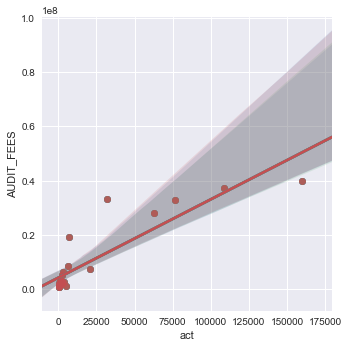

In [66]:
sns.regplot(x="act", y="AUDIT_FEES", data=df)
plt.show()

#### Audit fee ~ AT Regression plot

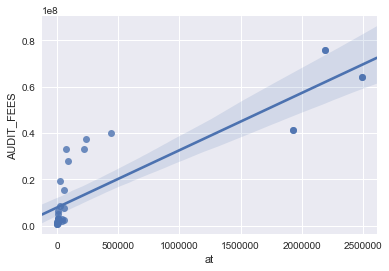

In [67]:
sns.regplot(x="at", y="AUDIT_FEES", data=df)
plt.show()

I chose to display the regression plots for "AT" and "ACT" are plotted based on the Regression summary and the correlation matrix. These financial characteristics were found to have the most dependancy on the Audit fee.

Regression analysis is a great tool to analyze the relationship between variables. It can help businesses create models to project future supply/demand by establishing factors that influence the said parameters. It can also be used to optimize business processes by laying the foundations to examine the processes by verifying dependencies of different factors.